## Image Similarity Search Using KNN

### import needed libraries

In [19]:
from PIL import Image
from sklearn.neighbors import NearestNeighbors
import numpy as np

### build an Image Finder

In [20]:
from PIL import Image
import numpy as np
from sklearn.neighbors import NearestNeighbors

class ImageSimilarityFinder:
    def __init__(self, k=3):
        """Initialize the image finder"""
        self.k = k
        self.model = NearestNeighbors(n_neighbors=k)
        
    def _preprocess_image(self, image):
        """Convert image to a feature vector"""
        # Resize for consistency
        image = image.resize((64, 64))
        # Convert to grayscale
        if image.mode != 'L':
            image = image.convert('L')
        # Flatten to 1D array
        return np.array(image).flatten()
        
    def fit(self, image_paths):
        """Build index of images"""
        self.image_paths = image_paths
        features = []
        
        for path in image_paths:
            image = Image.open(path)
            features.append(self._preprocess_image(image))
            
        self.model.fit(features)
        
    def find_similar(self, query_image_path):
        """Find similar images"""
        # Process query image
        query_image = Image.open(query_image_path)
        query_features = self._preprocess_image(query_image)
        
        # Find nearest neighbors
        distances, indices = self.model.kneighbors([query_features])
        
        # Convert distances to similarity scores between 0 and 1
        similar_images = [
            (self.image_paths[i], 1 / (1 + d)) 
            for i, d in zip(indices[0], distances[0])
        ]
        
        return similar_images



In [21]:
# get images from scikit image
from skimage import data
from skimage.io import imsave

imsave('image1.jpg', data.astronaut())
imsave('image2.jpg', data.chelsea())
imsave('image3.jpg', data.coffee())
imsave('query_image.jpg', data.chelsea())  # same as image2, for similarity

# Example usage
image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']
finder = ImageSimilarityFinder()
finder.fit(image_paths)

# Find images similar to a query image
similar_images = finder.find_similar('query_image.jpg')
print("Similar images found:")
for path, similarity in similar_images:
    print(f"{path} (similarity: {similarity:.2f})")

Similar images found:
image2.jpg (similarity: 1.00)
image3.jpg (similarity: 0.00)
image1.jpg (similarity: 0.00)


### Print the images

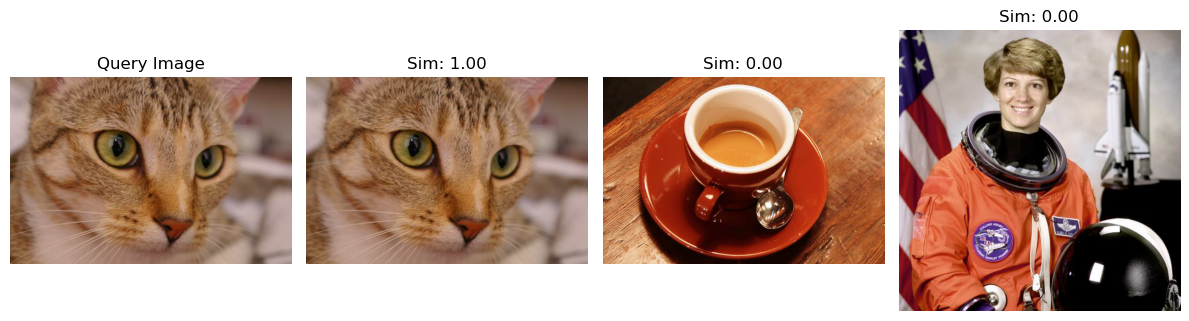

In [22]:
import matplotlib.pyplot as plt
# Plot the query image and similar images with similarity scores
plt.figure(figsize=(12, 4))

# Show query image
plt.subplot(1, len(similar_images) + 1, 1)
query_img = Image.open('query_image.jpg')
plt.imshow(query_img)
plt.title("Query Image")
plt.axis('off')

# Show similar images
for i, (path, similarity) in enumerate(similar_images, start=2):
    img = Image.open(path)
    plt.subplot(1, len(similar_images) + 1, i)
    plt.imshow(img)
    plt.title(f"Sim: {similarity:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### as shown at the images above, the query image is the same as the first image. So, the model successfully showed that the query image is similar to image #1